In [1]:
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [3]:
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

print('input 1 :\n\t {}'.format(in_seq1))
print('input 2 :\n\t {}'.format(in_seq2))
print('output :\n\t {}'.format(out_seq))

input 1 :
	 [10 20 30 40 50 60 70 80 90]
input 2 :
	 [15 25 35 45 55 65 75 85 95]
output :
	 [ 25  45  65  85 105 125 145 165 185]


In [4]:
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

In [5]:
dataset = hstack((in_seq1, in_seq2, out_seq))
dataset

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [6]:
# choose a number of time steps
n_steps = 3

X, y = split_sequences(dataset, n_steps)
print('X: ')
print(X)
print()
print('y: ')
print(y)

X: 
[[[10 15]
  [20 25]
  [30 35]]

 [[20 25]
  [30 35]
  [40 45]]

 [[30 35]
  [40 45]
  [50 55]]

 [[40 45]
  [50 55]
  [60 65]]

 [[50 55]
  [60 65]
  [70 75]]

 [[60 65]
  [70 75]
  [80 85]]

 [[70 75]
  [80 85]
  [90 95]]]

y: 
[ 65  85 105 125 145 165 185]


In [7]:
# separate input data
X1 = X[:, :, 0]
X2 = X[:, :, 1]
print(X1)
print('-'*20)
print(X2)

[[10 20 30]
 [20 30 40]
 [30 40 50]
 [40 50 60]
 [50 60 70]
 [60 70 80]
 [70 80 90]]
--------------------
[[15 25 35]
 [25 35 45]
 [35 45 55]
 [45 55 65]
 [55 65 75]
 [65 75 85]
 [75 85 95]]


In [8]:
# first input model
visible1 = Input(shape=(n_steps,))
dense1 = Dense(100, activation='relu')(visible1)
# second input model
visible2 = Input(shape=(n_steps,))
dense2 = Dense(100, activation='relu')(visible2)
# merge input models
merge = concatenate([dense1, dense2])
output = Dense(1)(merge)
model = Model(inputs=[visible1, visible2], outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 100)          400         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          400         input_2[0][0]                    
______________________________________________________________________________________________

In [10]:
callbacks = [
    TensorBoard(
        log_dir='my_log_dir', histogram_freq=1, embeddings_freq=1,
    )]


model.compile(optimizer='adam', loss='mse')
history = model.fit([X1, X2], y, epochs=1700, callbacks=callbacks, verbose=2)

/usr/local/anaconda3/lib/python3.7/site-packages/keras/callbacks/tensorboard_v2.py:102: UserWarning: The TensorBoard callback does not support embeddings display when using TensorFlow 2.0. Embeddings-related arguments are ignored.
  warnings.warn('The TensorBoard callback does not support '


Epoch 1/1700
1/1 - 0s - loss: 17691.9395
Epoch 2/1700
1/1 - 0s - loss: 16929.4824
Epoch 3/1700
1/1 - 0s - loss: 16186.5332
Epoch 4/1700
1/1 - 0s - loss: 15461.9238
Epoch 5/1700
1/1 - 0s - loss: 14754.7109
Epoch 6/1700
1/1 - 0s - loss: 14066.3887
Epoch 7/1700
1/1 - 0s - loss: 13397.4746
Epoch 8/1700
1/1 - 0s - loss: 12747.0293
Epoch 9/1700
1/1 - 0s - loss: 12115.0713
Epoch 10/1700
1/1 - 0s - loss: 11500.8896
Epoch 11/1700
1/1 - 0s - loss: 10904.3828
Epoch 12/1700
1/1 - 0s - loss: 10327.4609
Epoch 13/1700
1/1 - 0s - loss: 9769.5303
Epoch 14/1700
1/1 - 0s - loss: 9230.7334
Epoch 15/1700
1/1 - 0s - loss: 8710.0195
Epoch 16/1700
1/1 - 0s - loss: 8207.1230
Epoch 17/1700
1/1 - 0s - loss: 7722.5010
Epoch 18/1700
1/1 - 0s - loss: 7255.7007
Epoch 19/1700
1/1 - 0s - loss: 6806.3003
Epoch 20/1700
1/1 - 0s - loss: 6374.6611
Epoch 21/1700
1/1 - 0s - loss: 5959.8892
Epoch 22/1700
1/1 - 0s - loss: 5561.3130
Epoch 23/1700
1/1 - 0s - loss: 5179.6851
Epoch 24/1700
1/1 - 0s - loss: 4814.1753
Epoch 25/1700

Epoch 206/1700
1/1 - 0s - loss: 35.6461
Epoch 207/1700
1/1 - 0s - loss: 35.5712
Epoch 208/1700
1/1 - 0s - loss: 35.4960
Epoch 209/1700
1/1 - 0s - loss: 35.4207
Epoch 210/1700
1/1 - 0s - loss: 35.3452
Epoch 211/1700
1/1 - 0s - loss: 35.2694
Epoch 212/1700
1/1 - 0s - loss: 35.1935
Epoch 213/1700
1/1 - 0s - loss: 35.1174
Epoch 214/1700
1/1 - 0s - loss: 35.0410
Epoch 215/1700
1/1 - 0s - loss: 34.9646
Epoch 216/1700
1/1 - 0s - loss: 34.8878
Epoch 217/1700
1/1 - 0s - loss: 34.8109
Epoch 218/1700
1/1 - 0s - loss: 34.7338
Epoch 219/1700
1/1 - 0s - loss: 34.6564
Epoch 220/1700
1/1 - 0s - loss: 34.5790
Epoch 221/1700
1/1 - 0s - loss: 34.5012
Epoch 222/1700
1/1 - 0s - loss: 34.4233
Epoch 223/1700
1/1 - 0s - loss: 34.3453
Epoch 224/1700
1/1 - 0s - loss: 34.2670
Epoch 225/1700
1/1 - 0s - loss: 34.1885
Epoch 226/1700
1/1 - 0s - loss: 34.1098
Epoch 227/1700
1/1 - 0s - loss: 34.0310
Epoch 228/1700
1/1 - 0s - loss: 33.9519
Epoch 229/1700
1/1 - 0s - loss: 33.8726
Epoch 230/1700
1/1 - 0s - loss: 33.7932


Epoch 411/1700
1/1 - 0s - loss: 17.3457
Epoch 412/1700
1/1 - 0s - loss: 17.2523
Epoch 413/1700
1/1 - 0s - loss: 17.1591
Epoch 414/1700
1/1 - 0s - loss: 17.0659
Epoch 415/1700
1/1 - 0s - loss: 16.9731
Epoch 416/1700
1/1 - 0s - loss: 16.8802
Epoch 417/1700
1/1 - 0s - loss: 16.7873
Epoch 418/1700
1/1 - 0s - loss: 16.6947
Epoch 419/1700
1/1 - 0s - loss: 16.6021
Epoch 420/1700
1/1 - 0s - loss: 16.5097
Epoch 421/1700
1/1 - 0s - loss: 16.4175
Epoch 422/1700
1/1 - 0s - loss: 16.3253
Epoch 423/1700
1/1 - 0s - loss: 16.2332
Epoch 424/1700
1/1 - 0s - loss: 16.1414
Epoch 425/1700
1/1 - 0s - loss: 16.0496
Epoch 426/1700
1/1 - 0s - loss: 15.9579
Epoch 427/1700
1/1 - 0s - loss: 15.8664
Epoch 428/1700
1/1 - 0s - loss: 15.7751
Epoch 429/1700
1/1 - 0s - loss: 15.6839
Epoch 430/1700
1/1 - 0s - loss: 15.5929
Epoch 431/1700
1/1 - 0s - loss: 15.5020
Epoch 432/1700
1/1 - 0s - loss: 15.4113
Epoch 433/1700
1/1 - 0s - loss: 15.3207
Epoch 434/1700
1/1 - 0s - loss: 15.2303
Epoch 435/1700
1/1 - 0s - loss: 15.1401


Epoch 619/1700
1/1 - 0s - loss: 3.1702
Epoch 620/1700
1/1 - 0s - loss: 3.1346
Epoch 621/1700
1/1 - 0s - loss: 3.0992
Epoch 622/1700
1/1 - 0s - loss: 3.0642
Epoch 623/1700
1/1 - 0s - loss: 3.0294
Epoch 624/1700
1/1 - 0s - loss: 2.9950
Epoch 625/1700
1/1 - 0s - loss: 2.9609
Epoch 626/1700
1/1 - 0s - loss: 2.9270
Epoch 627/1700
1/1 - 0s - loss: 2.8935
Epoch 628/1700
1/1 - 0s - loss: 2.8602
Epoch 629/1700
1/1 - 0s - loss: 2.8272
Epoch 630/1700
1/1 - 0s - loss: 2.7945
Epoch 631/1700
1/1 - 0s - loss: 2.7621
Epoch 632/1700
1/1 - 0s - loss: 2.7300
Epoch 633/1700
1/1 - 0s - loss: 2.6981
Epoch 634/1700
1/1 - 0s - loss: 2.6666
Epoch 635/1700
1/1 - 0s - loss: 2.6354
Epoch 636/1700
1/1 - 0s - loss: 2.6043
Epoch 637/1700
1/1 - 0s - loss: 2.5736
Epoch 638/1700
1/1 - 0s - loss: 2.5432
Epoch 639/1700
1/1 - 0s - loss: 2.5131
Epoch 640/1700
1/1 - 0s - loss: 2.4832
Epoch 641/1700
1/1 - 0s - loss: 2.4536
Epoch 642/1700
1/1 - 0s - loss: 2.4243
Epoch 643/1700
1/1 - 0s - loss: 2.3952
Epoch 644/1700
1/1 - 0s -

Epoch 830/1700
1/1 - 0s - loss: 0.1478
Epoch 831/1700
1/1 - 0s - loss: 0.1452
Epoch 832/1700
1/1 - 0s - loss: 0.1427
Epoch 833/1700
1/1 - 0s - loss: 0.1402
Epoch 834/1700
1/1 - 0s - loss: 0.1377
Epoch 835/1700
1/1 - 0s - loss: 0.1353
Epoch 836/1700
1/1 - 0s - loss: 0.1329
Epoch 837/1700
1/1 - 0s - loss: 0.1306
Epoch 838/1700
1/1 - 0s - loss: 0.1282
Epoch 839/1700
1/1 - 0s - loss: 0.1260
Epoch 840/1700
1/1 - 0s - loss: 0.1237
Epoch 841/1700
1/1 - 0s - loss: 0.1215
Epoch 842/1700
1/1 - 0s - loss: 0.1194
Epoch 843/1700
1/1 - 0s - loss: 0.1173
Epoch 844/1700
1/1 - 0s - loss: 0.1152
Epoch 845/1700
1/1 - 0s - loss: 0.1131
Epoch 846/1700
1/1 - 0s - loss: 0.1111
Epoch 847/1700
1/1 - 0s - loss: 0.1091
Epoch 848/1700
1/1 - 0s - loss: 0.1071
Epoch 849/1700
1/1 - 0s - loss: 0.1052
Epoch 850/1700
1/1 - 0s - loss: 0.1033
Epoch 851/1700
1/1 - 0s - loss: 0.1015
Epoch 852/1700
1/1 - 0s - loss: 0.0996
Epoch 853/1700
1/1 - 0s - loss: 0.0978
Epoch 854/1700
1/1 - 0s - loss: 0.0961
Epoch 855/1700
1/1 - 0s -

1/1 - 0s - loss: 0.0030
Epoch 1040/1700
1/1 - 0s - loss: 0.0030
Epoch 1041/1700
1/1 - 0s - loss: 0.0029
Epoch 1042/1700
1/1 - 0s - loss: 0.0029
Epoch 1043/1700
1/1 - 0s - loss: 0.0029
Epoch 1044/1700
1/1 - 0s - loss: 0.0028
Epoch 1045/1700
1/1 - 0s - loss: 0.0028
Epoch 1046/1700
1/1 - 0s - loss: 0.0027
Epoch 1047/1700
1/1 - 0s - loss: 0.0027
Epoch 1048/1700
1/1 - 0s - loss: 0.0027
Epoch 1049/1700
1/1 - 0s - loss: 0.0026
Epoch 1050/1700
1/1 - 0s - loss: 0.0026
Epoch 1051/1700
1/1 - 0s - loss: 0.0025
Epoch 1052/1700
1/1 - 0s - loss: 0.0025
Epoch 1053/1700
1/1 - 0s - loss: 0.0025
Epoch 1054/1700
1/1 - 0s - loss: 0.0024
Epoch 1055/1700
1/1 - 0s - loss: 0.0024
Epoch 1056/1700
1/1 - 0s - loss: 0.0024
Epoch 1057/1700
1/1 - 0s - loss: 0.0023
Epoch 1058/1700
1/1 - 0s - loss: 0.0023
Epoch 1059/1700
1/1 - 0s - loss: 0.0023
Epoch 1060/1700
1/1 - 0s - loss: 0.0022
Epoch 1061/1700
1/1 - 0s - loss: 0.0022
Epoch 1062/1700
1/1 - 0s - loss: 0.0022
Epoch 1063/1700
1/1 - 0s - loss: 0.0022
Epoch 1064/1700


1/1 - 0s - loss: 8.8560e-04
Epoch 1239/1700
1/1 - 0s - loss: 8.8455e-04
Epoch 1240/1700
1/1 - 0s - loss: 8.8339e-04
Epoch 1241/1700
1/1 - 0s - loss: 8.8258e-04
Epoch 1242/1700
1/1 - 0s - loss: 8.8133e-04
Epoch 1243/1700
1/1 - 0s - loss: 8.8041e-04
Epoch 1244/1700
1/1 - 0s - loss: 8.7973e-04
Epoch 1245/1700
1/1 - 0s - loss: 8.7854e-04
Epoch 1246/1700
1/1 - 0s - loss: 8.7759e-04
Epoch 1247/1700
1/1 - 0s - loss: 8.7631e-04
Epoch 1248/1700
1/1 - 0s - loss: 8.7556e-04
Epoch 1249/1700
1/1 - 0s - loss: 8.7460e-04
Epoch 1250/1700
1/1 - 0s - loss: 8.7342e-04
Epoch 1251/1700
1/1 - 0s - loss: 8.7277e-04
Epoch 1252/1700
1/1 - 0s - loss: 8.7212e-04
Epoch 1253/1700
1/1 - 0s - loss: 8.7135e-04
Epoch 1254/1700
1/1 - 0s - loss: 8.7035e-04
Epoch 1255/1700
1/1 - 0s - loss: 8.6922e-04
Epoch 1256/1700
1/1 - 0s - loss: 8.6824e-04
Epoch 1257/1700
1/1 - 0s - loss: 8.6759e-04
Epoch 1258/1700
1/1 - 0s - loss: 8.6693e-04
Epoch 1259/1700
1/1 - 0s - loss: 8.6625e-04
Epoch 1260/1700
1/1 - 0s - loss: 8.6563e-04
Epoc

Epoch 1425/1700
1/1 - 0s - loss: 8.1720e-04
Epoch 1426/1700
1/1 - 0s - loss: 8.1726e-04
Epoch 1427/1700
1/1 - 0s - loss: 8.1715e-04
Epoch 1428/1700
1/1 - 0s - loss: 8.1719e-04
Epoch 1429/1700
1/1 - 0s - loss: 8.1695e-04
Epoch 1430/1700
1/1 - 0s - loss: 8.1676e-04
Epoch 1431/1700
1/1 - 0s - loss: 8.1674e-04
Epoch 1432/1700
1/1 - 0s - loss: 8.1661e-04
Epoch 1433/1700
1/1 - 0s - loss: 8.1662e-04
Epoch 1434/1700
1/1 - 0s - loss: 8.1642e-04
Epoch 1435/1700
1/1 - 0s - loss: 8.1636e-04
Epoch 1436/1700
1/1 - 0s - loss: 8.1641e-04
Epoch 1437/1700
1/1 - 0s - loss: 8.1613e-04
Epoch 1438/1700
1/1 - 0s - loss: 8.1624e-04
Epoch 1439/1700
1/1 - 0s - loss: 8.1602e-04
Epoch 1440/1700
1/1 - 0s - loss: 8.1579e-04
Epoch 1441/1700
1/1 - 0s - loss: 8.1589e-04
Epoch 1442/1700
1/1 - 0s - loss: 8.1570e-04
Epoch 1443/1700
1/1 - 0s - loss: 8.1567e-04
Epoch 1444/1700
1/1 - 0s - loss: 8.1563e-04
Epoch 1445/1700
1/1 - 0s - loss: 8.1535e-04
Epoch 1446/1700
1/1 - 0s - loss: 8.1534e-04
Epoch 1447/1700
1/1 - 0s - loss:

1/1 - 0s - loss: 8.0113e-04
Epoch 1612/1700
1/1 - 0s - loss: 8.0098e-04
Epoch 1613/1700
1/1 - 0s - loss: 8.0101e-04
Epoch 1614/1700
1/1 - 0s - loss: 8.0094e-04
Epoch 1615/1700
1/1 - 0s - loss: 8.0075e-04
Epoch 1616/1700
1/1 - 0s - loss: 8.0091e-04
Epoch 1617/1700
1/1 - 0s - loss: 8.0056e-04
Epoch 1618/1700
1/1 - 0s - loss: 8.0043e-04
Epoch 1619/1700
1/1 - 0s - loss: 8.0034e-04
Epoch 1620/1700
1/1 - 0s - loss: 8.0045e-04
Epoch 1621/1700
1/1 - 0s - loss: 8.0044e-04
Epoch 1622/1700
1/1 - 0s - loss: 8.0025e-04
Epoch 1623/1700
1/1 - 0s - loss: 8.0011e-04
Epoch 1624/1700
1/1 - 0s - loss: 8.0014e-04
Epoch 1625/1700
1/1 - 0s - loss: 8.0000e-04
Epoch 1626/1700
1/1 - 0s - loss: 8.0004e-04
Epoch 1627/1700
1/1 - 0s - loss: 7.9988e-04
Epoch 1628/1700
1/1 - 0s - loss: 7.9995e-04
Epoch 1629/1700
1/1 - 0s - loss: 7.9977e-04
Epoch 1630/1700
1/1 - 0s - loss: 7.9952e-04
Epoch 1631/1700
1/1 - 0s - loss: 7.9951e-04
Epoch 1632/1700
1/1 - 0s - loss: 7.9942e-04
Epoch 1633/1700
1/1 - 0s - loss: 7.9936e-04
Epoc

In [15]:
!tensorboard --logdir=my_log_dir

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.2.2 at http://localhost:6006/ (Press CTRL+C to quit)
^C


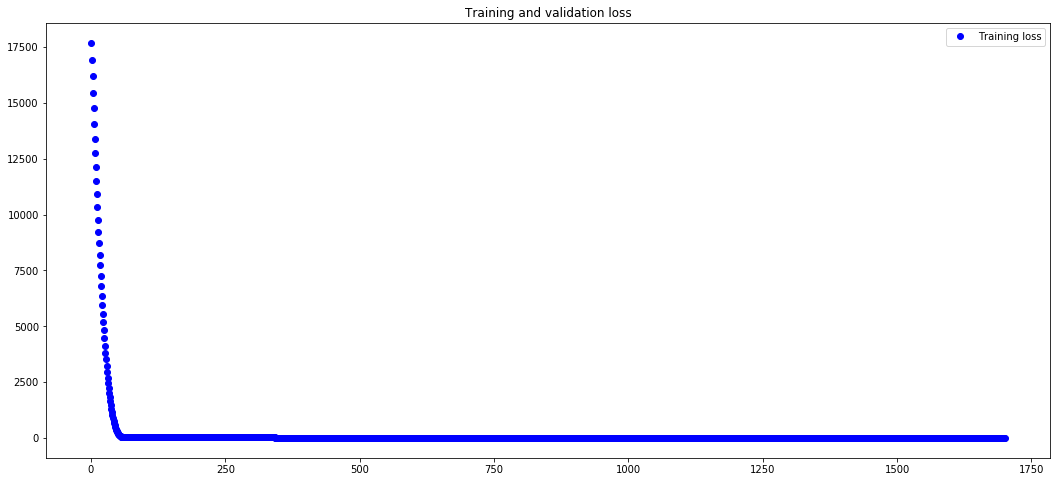

In [14]:
import matplotlib.pyplot as plt
loss = history.history['loss'] 

epochs = range(1, len(loss) + 1) 

plt.figure(figsize=(18, 8))
plt.plot(epochs, loss, 'bo', label='Training loss') 

#plt.ylim(0, 0.003)
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x1 = x_input[:, 0].reshape((1, n_steps))
x2 = x_input[:, 1].reshape((1, n_steps))
yhat = model.predict([x1, x2], verbose=0)

print(yhat)

[[205.2394]]
